In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score 
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import Ridge, Lasso

In [ ]:
df = pd.read_csv('StarClassificationDataset 2.csv')

/var/folders/f_/3c44mc6d1csd1kdh861sc_xh0000gp/T/ipykernel_21351/3102839712.py:1: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/rushikesh/Desktop/Jay/AOML/StarClassificationDataset 2.csv')


In [5]:
df = df[df['alpha'] != '     ']

In [6]:
df['alpha'] = df['alpha'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99999 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   object_ID       99999 non-null  float64
 1   alpha           99998 non-null  float64
 2   delta           99997 non-null  float64
 3   UV_filter       99999 non-null  float64
 4   green_filter    99999 non-null  float64
 5   red_filter      99999 non-null  float64
 6   near_IR_filter  99999 non-null  float64
 7   IR_filter       99999 non-null  float64
 8   run_ID          99993 non-null  object 
 9   rerun_ID        99999 non-null  int64  
 10  cam_col         99999 non-null  int64  
 11  field_ID        99999 non-null  int64  
 12  spec_obj_ID     99999 non-null  float64
 13  red_shift       99999 non-null  float64
 14  plate_ID        99999 non-null  int64  
 15  MJD             99999 non-null  int64  
 16  fiber_ID        99999 non-null  int64  
 17  class           99999 non-null  obje

In [7]:
df = df[df['run_ID'] != '   ']
df['run_ID'] = df['run_ID'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99998 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   object_ID       99998 non-null  float64
 1   alpha           99997 non-null  float64
 2   delta           99996 non-null  float64
 3   UV_filter       99998 non-null  float64
 4   green_filter    99998 non-null  float64
 5   red_filter      99998 non-null  float64
 6   near_IR_filter  99998 non-null  float64
 7   IR_filter       99998 non-null  float64
 8   run_ID          99992 non-null  float64
 9   rerun_ID        99998 non-null  int64  
 10  cam_col         99998 non-null  int64  
 11  field_ID        99998 non-null  int64  
 12  spec_obj_ID     99998 non-null  float64
 13  red_shift       99998 non-null  float64
 14  plate_ID        99998 non-null  int64  
 15  MJD             99998 non-null  int64  
 16  fiber_ID        99998 non-null  int64  
 17  class           99998 non-null  obje

In [8]:
df.dropna(inplace=True, axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99989 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   object_ID       99989 non-null  float64
 1   alpha           99989 non-null  float64
 2   delta           99989 non-null  float64
 3   UV_filter       99989 non-null  float64
 4   green_filter    99989 non-null  float64
 5   red_filter      99989 non-null  float64
 6   near_IR_filter  99989 non-null  float64
 7   IR_filter       99989 non-null  float64
 8   run_ID          99989 non-null  float64
 9   rerun_ID        99989 non-null  int64  
 10  cam_col         99989 non-null  int64  
 11  field_ID        99989 non-null  int64  
 12  spec_obj_ID     99989 non-null  float64
 13  red_shift       99989 non-null  float64
 14  plate_ID        99989 non-null  int64  
 15  MJD             99989 non-null  int64  
 16  fiber_ID        99989 non-null  int64  
 17  class           99989 non-null  obje

In [9]:
df.isna().sum()

object_ID         0
alpha             0
delta             0
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
run_ID            0
rerun_ID          0
cam_col           0
field_ID          0
spec_obj_ID       0
red_shift         0
plate_ID          0
MJD               0
fiber_ID          0
class             0
dtype: int64

In [10]:
df.drop(['near_IR_filter'],axis=1,inplace=True)
df.drop(['UV_filter'],axis=1,inplace=True)
df.drop(['spec_obj_ID'], axis=1,inplace=True)
#dropped due to high correlation.

In [11]:
X = df[['alpha','delta', 'green_filter','plate_ID','red_filter','red_shift']]
X = add_constant(X)

vif_df = pd.DataFrame()
vif_df['feature']=X.columns
vif_df['VIF']=[variance_inflation_factor(X.values,i)
               for i in range(len(X.columns))]
vif_df

,feature,VIF
0,const,180.363320
1,alpha,1.020208
2,delta,1.044637
3,green_filter,1.003951
4,plate_ID,1.836709
5,red_filter,1.902509
6,red_shift,1.261321


In [12]:
df.drop(['object_ID','rerun_ID'],axis=1, inplace=True) #dropping since they have only 1 unique value

In [13]:
df.nunique()

alpha           99986
delta           99988
green_filter    92642
red_filter      91891
IR_filter       91996
run_ID            430
cam_col             6
field_ID          856
red_shift       94666
plate_ID         6284
MJD              2180
fiber_ID         1000
class               3
dtype: int64

In [14]:
scaler = StandardScaler()
df[['alpha','delta','green_filter','red_filter','red_shift']] = scaler.fit_transform(df[['alpha','delta','green_filter','red_filter','red_shift']]).astype(float)

In [15]:
df.drop(['run_ID','field_ID','plate_ID','fiber_ID'], axis=1, inplace=True)

In [16]:
X = df.drop('class',axis=1)
y = df['class']

In [17]:
y = df['class'].astype('category').cat.codes

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [19]:
model = SVC(kernel="rbf")  # You can change kernel to 'rbf', 'poly', etc.
model.fit(X_train, y_train)

SVC()

In [20]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.75     11887
           1       0.00      0.00      0.00      3792
           2       0.00      0.00      0.00      4319

    accuracy                           0.59     19998
   macro avg       0.20      0.33      0.25     19998
weighted avg       0.35      0.59      0.44     19998



/Users/rushikesh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rushikesh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rushikesh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


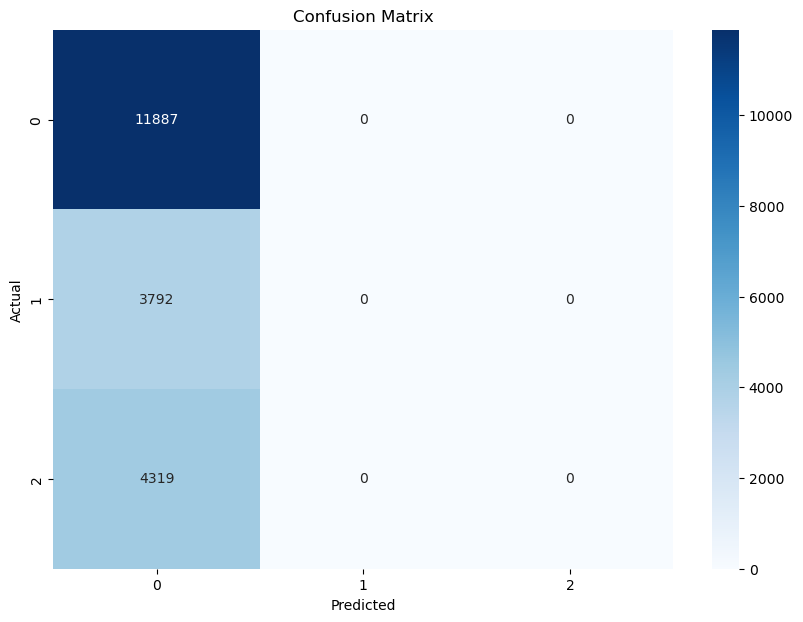

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##California Housing

In [44]:
df2 = pd.read_csv('housing 2.csv')

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [46]:
df2.isna().sum()  

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [47]:
df2.dropna(inplace=True)

In [48]:
N = len(df2)  # Number of samples
k = int(1 + np.log2(N))  # Number of bins using Sturges' rule

In [49]:
df2['ocean_proximity'] =  df2['ocean_proximity'].astype('category').cat.codes

In [50]:
df2["price_category"] = pd.cut(df2["median_house_value"], bins=k, labels=range(k))

In [51]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(df2, df2["price_category"]):
    strat_train_set = df2.iloc[train_idx].copy()
    strat_test_set = df2.iloc[test_idx].copy()

In [52]:
for dataset in (strat_train_set, strat_test_set):
    dataset.drop("price_category", axis=1, inplace=True)

In [53]:
X_train = strat_train_set.drop("median_house_value", axis=1)
y_train = strat_train_set["median_house_value"]
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"]

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1701,-122.30,37.97,30.0,4030.0,772.0,1777.0,718.0,3.6393,NEAR BAY
13618,-117.27,34.13,36.0,3337.0,687.0,2388.0,589.0,2.9628,INLAND
3329,-122.74,38.83,12.0,4515.0,909.0,1554.0,528.0,3.3531,<1H OCEAN
10968,-117.87,33.77,52.0,2512.0,356.0,978.0,365.0,8.0784,<1H OCEAN
10047,-120.99,39.20,15.0,2993.0,562.0,1296.0,518.0,3.3009,INLAND


In [56]:
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

In [57]:
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [58]:
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE, MSE, and RMSE for Ridge
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

# Calculate MAE, MSE, and RMSE for Lasso
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

# Print the results
print(f"Ridge Regression - MAE: {mae_ridge}, MSE: {mse_ridge}, RMSE: {rmse_ridge}")
print(f"Lasso Regression - MAE: {mae_lasso}, MSE: {mse_lasso}, RMSE: {rmse_lasso}")

Ridge Regression - MAE: 50558.43522950641, MSE: 4776510229.643591, RMSE: 69112.30157970136
Lasso Regression - MAE: 50558.55326404528, MSE: 4776552895.078106, RMSE: 69112.6102464529
